In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# read in the dataset and preview the first few rows
df = pd.read_csv("/content/drive/MyDrive/Dataset/Pyspark/data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data Preprocessing

In [ ]:
# Let's create a new column called 'TotalPrice' that represents the total price for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Now, let's get some summary statistics for the numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
df.info() #overall view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalPrice   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


Now Cleanup the Data

In [ ]:
missing_description = df.loc[df.Description.isnull()]
# loc[] is used to retrieve the group of rows and columns by labels or a boolean array in the DataFrame. 
#It takes only index labels, and if it exists in the caller DataFrame, it returns the rows, columns, or DataFrame
missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom,0.0


In [ ]:
missing_description.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

To check for cancelled purchases

In [ ]:
cancelled_purchases = df[df['Quantity'] < 0]
cancelled_purchases.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


To contain only purchased orders

In [ ]:
clean_purchases = df[df['Quantity'] > 0]
clean_purchases.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


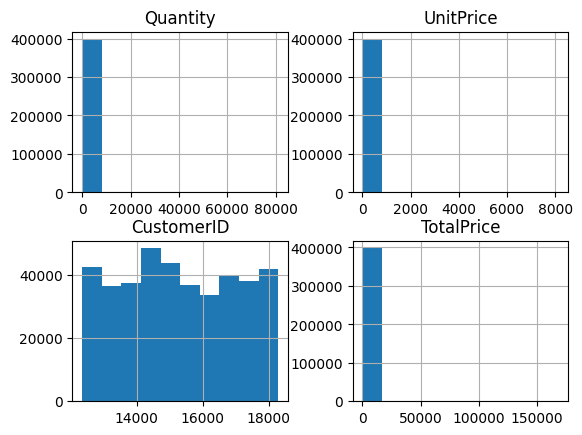

In [ ]:
# We can also visualize the distribution of the numerical columns using histograms
clean_purchases.hist()
plt.show()

What is the average transaction value and quantity per transaction, and how do they vary by country?


Country
Netherlands    120.798282
Australia      116.895620
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Denmark         49.882474
Lithuania       47.458857
Lebanon         37.641778
EIRE            36.687745
Brazil          35.737500
Name: TotalPrice, dtype: float64
Country
Netherlands       85.034702
Japan             81.046729
Sweden            80.006652
Australia         71.062447
Czech Republic    26.840000
Singapore         23.608108
Denmark           21.671053
EIRE              19.414894
Lithuania         18.628571
Canada            18.298013
Name: Quantity, dtype: float64


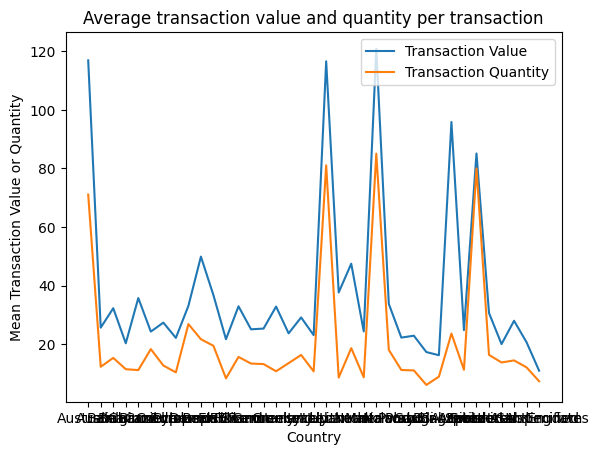

In [ ]:
# We can answer this question by grouping the data by country and calculating the mean for the 'TotalPrice' and 'Quantity' columns
mean_price_by_country = clean_purchases.groupby('Country')['TotalPrice'].mean()
mean_quantity_by_country = clean_purchases.groupby('Country')['Quantity'].mean()
print(mean_price_by_country.sort_values(ascending=False).head(10))
print(mean_quantity_by_country.sort_values(ascending=False).head(10))

# Now, we can use Seaborn to plot the mean transaction value and quantity
sns.lineplot(x=mean_price_by_country.index, y=mean_price_by_country.values, label='Transaction Value')
sns.lineplot(x=mean_quantity_by_country.index, y=mean_quantity_by_country.values, label='Transaction Quantity')
plt.title("Average transaction value and quantity per transaction")
plt.xlabel('Country')
plt.ylabel('Mean Transaction Value or Quantity')
plt.show()

Which products have the highest sales, and in which countries?

Description                         Country       
PAPER CRAFT , LITTLE BIRDIE         United Kingdom    168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom    110990.20
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom     94858.60
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom     80291.44
JUMBO BAG RED RETROSPOT             United Kingdom     77371.57
PARTY BUNTING                       United Kingdom     63109.38
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom     52395.99
CHILLI LIGHTS                       United Kingdom     45505.31
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     40451.08
PICNIC BASKET WICKER 60 PIECES      United Kingdom     39619.50
Name: TotalPrice, dtype: float64


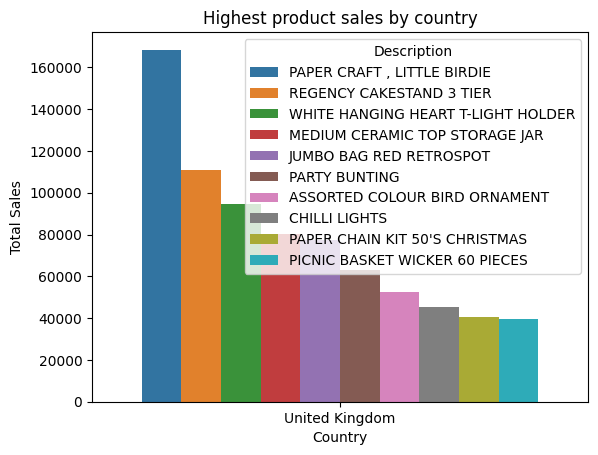

In [ ]:
# We can answer this question by grouping the data by product and country and summing the total sales for each group
product_sales_by_country = clean_purchases.groupby(['Description', 'Country'])['TotalPrice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

# Now, we can use Seaborn to plot the top 10 products with the highest sales, along with the country where they had the highest sales
top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='TotalPrice', hue='Description', data=top_products)
plt.title("Highest product sales by country")
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

What Products are most often sold together

In [ ]:
soldTogether = df.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()

In [ ]:
soldTogether #we got items that are sold together, separated by ","

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
22185,C581484,"PAPER CRAFT , LITTLE BIRDIE"
22186,C581490,"VICTORIAN GLASS HANGING T-LIGHT , ZINC T-LIGHT..."
22187,C581499,Manual
22188,C581568,VICTORIAN SEWING BOX LARGE


What product sold the most ?

In [ ]:
soldMost = df.groupby('Description').sum()[['Quantity']].reset_index()

<ipython-input-16-714add86a66a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soldMost = df.groupby('Description').sum()[['Quantity']].reset_index()


In [ ]:
soldMost = soldMost.sort_values('Quantity',ascending = False ).head(5) #the data was big for products so i have
#just got results for top 10
soldMost

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


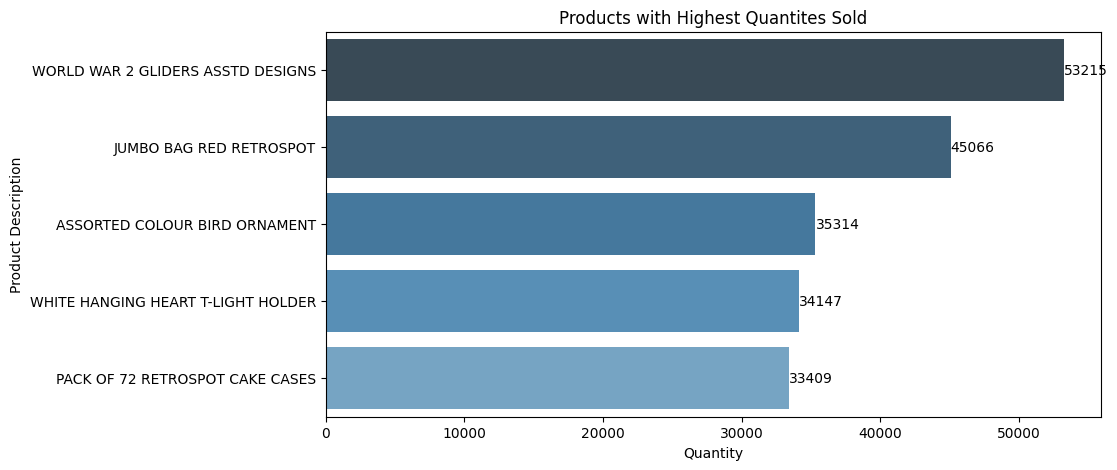

In [ ]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()

plt.figure(figsize = (10,5))
#Visualizing 
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = soldMost, palette = Palette)

#Data labels
ax.bar_label(ax.containers[0])

#Setting Title
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')
plt.show()

Which countries have more customers?

In [ ]:

custCountry = df['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts'] # renaming the columns

In [ ]:
custCountry

,Country,Counts
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1480
9,Australia,1259


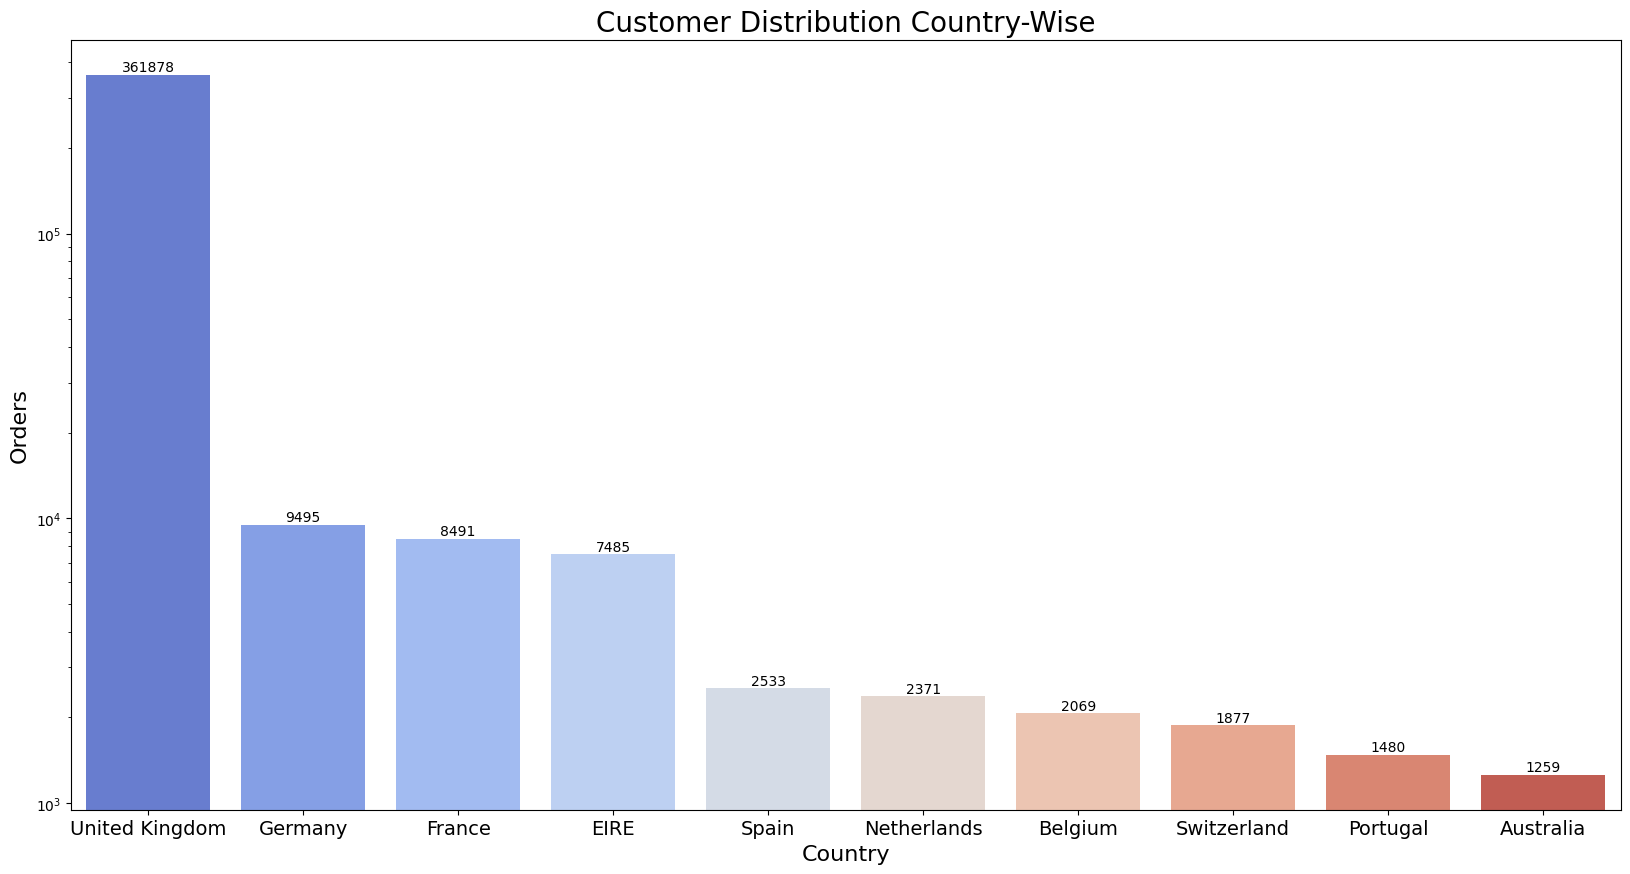

In [ ]:
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts'  , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

which day has more number of sales?

In [ ]:
daySales = df.groupby('Country').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Country','Sales']
daySales.sort_values(by='Country')

,Country,Sales
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32
5,Canada,151
6,Channel Islands,758
7,Cyprus,622
8,Czech Republic,30
9,Denmark,389


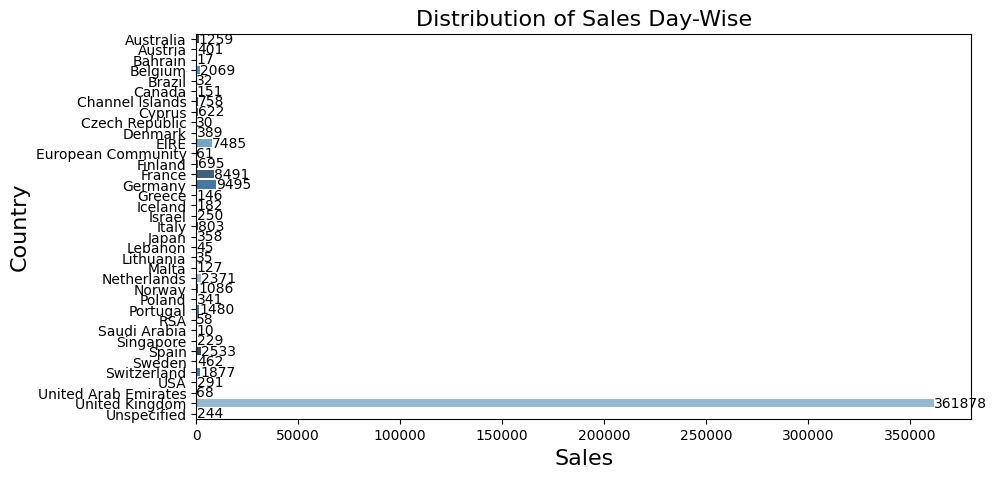

In [ ]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()

plt.figure(figsize = (10,5))
#Visualizing 
ax =sns.barplot(y = 'Country' , x= 'Sales' , data = daySales, palette = Palette)

#Data labels
ax.bar_label(ax.containers[0])

#Setting Title
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Country',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

What are the most popular products, and how do sales of these products vary over time?

Description                          InvoiceDate     
PAPER CRAFT , LITTLE BIRDIE          12/9/2011 9:15      168469.60
MEDIUM CERAMIC TOP STORAGE JAR       1/18/2011 10:01      77183.60
PICNIC BASKET WICKER 60 PIECES       6/10/2011 15:28      38970.00
POSTAGE                              5/3/2011 13:46        8142.75
SET OF TEA COFFEE SUGAR TINS PANTRY  9/20/2011 11:05       7144.72
FAIRY CAKE FLANNEL ASSORTED COLOUR   4/18/2011 13:20       6539.40
                                     1/11/2011 12:55       6539.40
Manual                               10/19/2011 11:18      6068.06
RABBIT NIGHT LIGHT                   10/27/2011 12:11      4992.00
WHITE HANGING HEART T-LIGHT HOLDER   1/11/2011 12:55       4921.50
Name: TotalPrice, dtype: float64


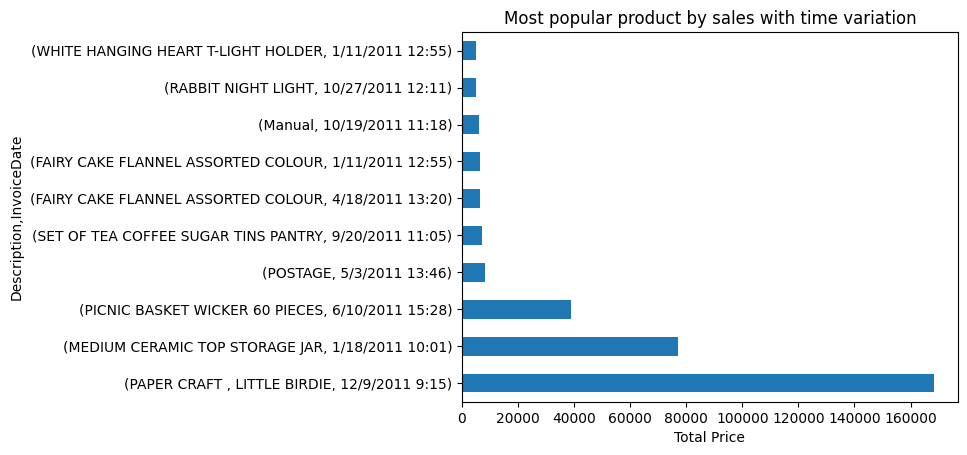

In [ ]:
# Group the data by product and sum the total sales for each product
product_sales_by_date = clean_purchases.groupby(['Description', 'InvoiceDate'])['TotalPrice'].sum()

# Sort the data by total sales and select the top 10 products
top_products = product_sales_by_date.sort_values(ascending=False).head(10)
print(top_products)

# Plot the data as a horizontal bar chart
top_products.plot(kind='barh')
plt.title("Most popular product by sales with time variation")
plt.xlabel("Total Price")
plt.show()

 Analyze and visualize total sales per year, month, transactions per week, transactions per day, and transactions per hour

In [ ]:
# let's copy our clean_purchases dataframe to avoid any distortion to our dataframe

df1 = clean_purchases.copy()

df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,NumTransactions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,297.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,172.0


In [ ]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,NumTransactions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,297.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,172.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,247.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,28.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,3.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,0.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,0.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,0.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,0.0


<ipython-input-67-79c44d1853f9>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week'] = df1['InvoiceDate'].dt.week


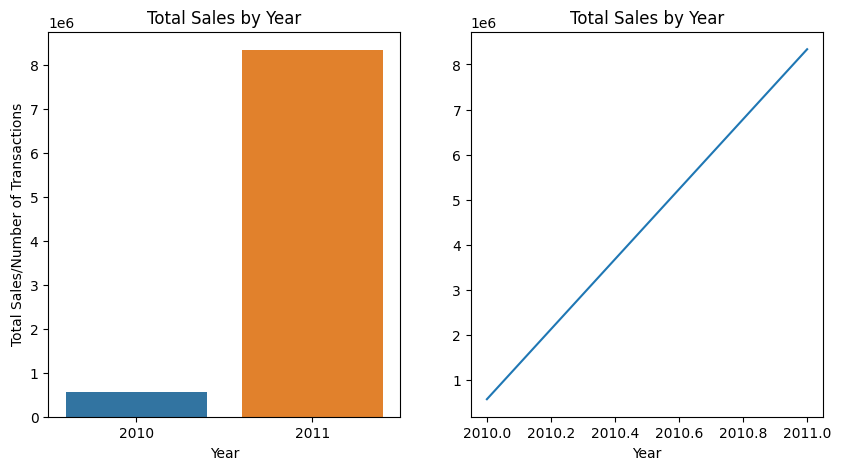

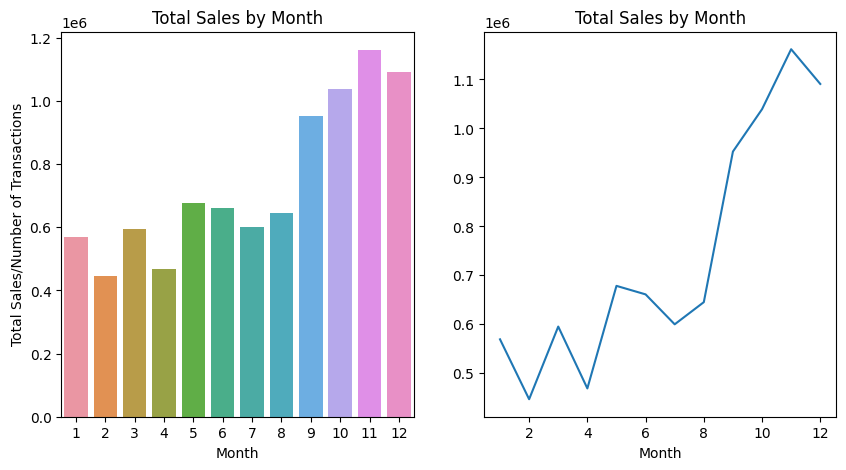

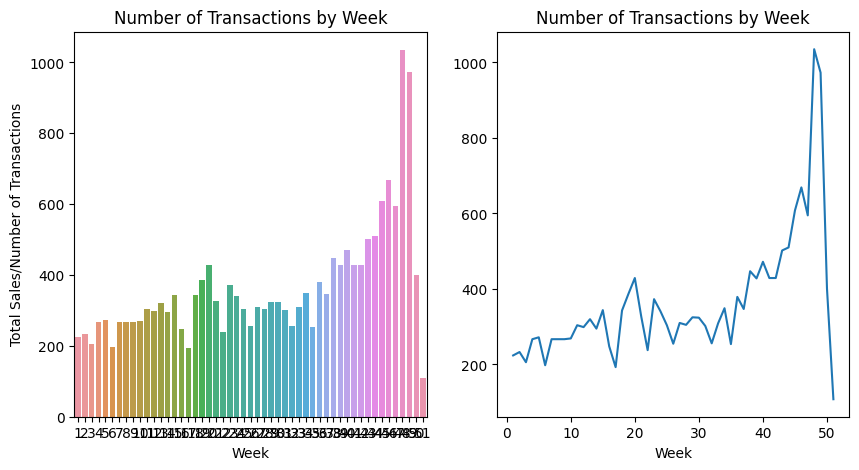

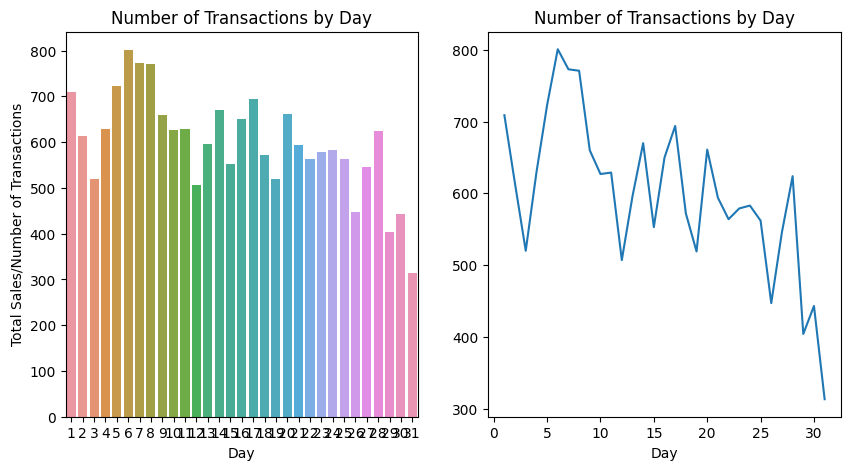

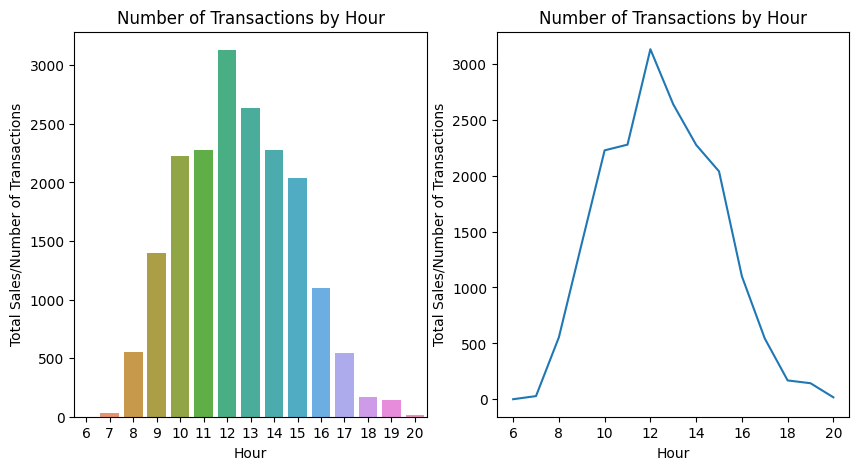

In [ ]:
# Now, we'll group the data by year and sum the total sales for each year
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['Year'] = df1['InvoiceDate'].dt.year
total_sales_by_year = df1.groupby('Year')['TotalPrice'].sum()

# Next, we'll group the data by month and sum the total sales for each month
df1['Month'] = df1['InvoiceDate'].dt.month
total_sales_by_month = df1.groupby('Month')['TotalPrice'].sum()

# Next, we'll group the data by week and count the number of transactions for each week
df1['Week'] = df1['InvoiceDate'].dt.week
num_transactions_by_week = df1.groupby('Week')['InvoiceNo'].nunique()

# Next, we'll group the data by day and count the number of transactions for each day
df1['Day'] = df1['InvoiceDate'].dt.day
num_transactions_by_day = df1.groupby('Day')['InvoiceNo'].nunique()

# Finally, we'll group the data by hour and count the number of transactions for each hour
df1['Hour'] = df1['InvoiceDate'].dt.hour
num_transactions_by_hour = df1.groupby('Hour')['InvoiceNo'].nunique()

df1

# Create a list of dataframes to loop through
dataframes = [total_sales_by_year, total_sales_by_month, num_transactions_by_week, num_transactions_by_day, num_transactions_by_hour]

# Create a list of titles for each dataframe
titles = ['Total Sales by Year', 'Total Sales by Month', 'Number of Transactions by Week', 'Number of Transactions by Day', 'Number of Transactions by Hour']

# Loop through the dataframes and plot a barplot and lineplot for each one
for df1, title in zip(dataframes, titles):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  sns.barplot(x=df1.index, y=df1.values, ax=ax1)
  ax1.set_title(title)
  if 'Year' in title:
    ax1.set_xlabel('Year')
  elif 'Month' in title:
    ax1.set_xlabel('Month')
  elif 'Week' in title:
    ax1.set_xlabel('Week')
  elif 'Day' in title:
    ax1.set_xlabel('Day')
  elif 'Hour' in title:
    ax1.set_xlabel('Hour')
  ax1.set_ylabel('Total Sales/Number of Transactions')
  sns.lineplot(x=df1.index, y=df1.values, ax=ax2)
  ax2.set_title(title)
  if 'Year' in title:
    ax2.set_xlabel('Year')
  elif 'Month' in title:
    ax2.set_xlabel('Month')
  elif 'Week' in title:
    ax2.set_xlabel('Week')
  elif 'Day' in title:
    ax2.set_xlabel('Day')
  elif 'Hour' in title:
    ax2.set_xlabel('Hour')
    ax2.set_ylabel('Total Sales/Number of Transactions')
plt.show()

In [ ]:
daySales = df1.groupby('Day').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Day','Sales']
#daySales.sort_values(by=['Country'])
daySales

,Day,Sales
0,1,13630
1,2,12101
2,3,10878
3,4,14882
4,5,16410
5,6,18349
6,7,15604
7,8,15854
8,9,12947
9,10,14075


In [ ]:
df1['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 397924, dtype: object

In [ ]:
#Choosing Palette and reverse it
# Palette = sns.color_palette('Blues_d')
# Palette.reverse()

# plt.figure(figsize = (10,5))
# #Visualizing 
# ax =sns.barplot(y = 'Country' , x= 'Sales' , data = daySales, palette = Palette)

# #Data labels
# ax.bar_label(ax.containers[0])

# #Setting Title
# plt.title('Distribution of Sales Day-Wise',fontsize = 16)
# plt.ylabel('Country',fontsize = 16)
# plt.xlabel('Sales',fontsize = 16)
# plt.show()

ValueError: ignored

<Figure size 1000x500 with 0 Axes>

What is the overall customer retention rate, and how does it vary by country or other factors?

In [ ]:
# We can answer this question by counting the number of unique customers for each year and country and calculating the retention rate as a percentage
num_customers_by_year_and_country = df1.groupby(['Year', 'Country'])['CustomerID'].nunique()
retention_rate_by_year_and_country = num_customers_by_year_and_country.pct_change().fillna(0)

# Now, we'll put the num_customers_by_year_and_country and retention_rate_by_year_and_country data into a single dataframe
df_retention = pd.concat([num_customers_by_year_and_country, retention_rate_by_year_and_country], axis=1)
df_retention.columns = ['NumCustomers', 'RetentionRate']

# Finally, we'll sort the data in descending order by retention rate
df_retention = df_retention.sort_values(by='RetentionRate', ascending=False)
df_retention.head(10)

NumCustomers  RetentionRate
Year Country                                    
2011 United Kingdom          3814         1906.0
2010 United Kingdom           815          406.5
2011 Spain                     29           28.0
2010 France                    15           14.0
2011 Belgium                   25           11.5
     Finland                   12           11.0
     Denmark                    9            8.0
     France                    84            6.0
2010 Portugal                   6            5.0
     Belgium                    4            3.0

In [ ]:
# we'll select only the unique CustomerIDs from the dataset
df_unique_customers = clean_purchases[['CustomerID']].drop_duplicates()

# Now, we'll group the data by customer and calculate the number of transactions for each customer
num_transactions_by_customer = clean_purchases.groupby('CustomerID')['InvoiceNo'].count()

# Finally, we'll merge the 'num_transactions_by_customer' dataframe with the 'df_unique_customers' dataframe to add the 'NumTransactions' column
df_with_num_transactions = pd.merge(df_unique_customers, num_transactions_by_customer, on='CustomerID')

# Now, we'll rename the 'InvoiceNo' column to 'NumTransactions'
df_with_num_transactions.rename(columns={'InvoiceNo': 'NumTransactions'}, inplace=True)

# Now, we'll add the 'NumTransactions' column to the 'df' dataframe
clean_purchases['NumTransactions'] = df_with_num_transactions['NumTransactions']

# Finally, we'll replace all NaN values in the 'NumTransactions' column with 0
clean_purchases['NumTransactions'].fillna(0, inplace=True)

df_with_num_transactions.head(10)

<ipython-input-55-872477bbe3be>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['NumTransactions'] = df_with_num_transactions['NumTransactions']
<ipython-input-55-872477bbe3be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['NumTransactions'].fillna(0, inplace=True)


,CustomerID,NumTransactions
0,17850.0,297
1,13047.0,172
2,12583.0,247
3,13748.0,28
4,15100.0,3
5,15291.0,103
6,14688.0,327
7,17809.0,61
8,15311.0,2379
9,16098.0,67


Can we predict customer churn or lifetime value based on past purchasing behavior?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." 
#Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
#The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

from sklearn.metrics import accuracy_score
#Accuracy classification score. In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true

# Next, we'll create a new column called 'churn' that indicates whether a customer has made a purchase in the past year
df1['churn'] = df1['Year'] < df1['Year'].max()

# Now, we'll create a new dataframe called 'X' that contains the features we'll use to predict churn (i.e., past purchasing behavior)
X = df1[['TotalPrice', 'Quantity', 'InvoiceNo']]

# Next, we'll create a new dataframe called 'y' that contains the target variable (i.e., churn)
y = df1['churn']

# Now, we'll split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Next, we'll train a random forest classifier on the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Now, we'll make predictions on the test data and calculate the accuracy of the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [ ]:
df1['churn'].value_counts()

False    371764
True      26160
Name: churn, dtype: int64

Can we identify customer segments or personas based on purchasing patterns, and how do these segments differ in terms of their purchasing behavior?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-58-a9225e73cfc0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['Segment'] = kmeans.predict(X)


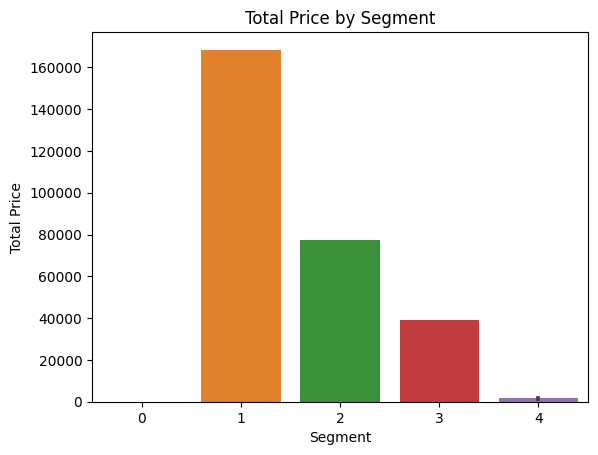

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Next, we'll create a new dataframe called 'X' that contains the features we'll use to cluster the customers (i.e., purchasing patterns)
X = clean_purchases[['TotalPrice', 'Quantity', 'NumTransactions']]

# Now, we'll use KMeans to cluster the customers into 5 segments
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Next, we'll add a new column to the dataframe called 'Segment' that indicates the segment each customer belongs to
clean_purchases['Segment'] = kmeans.predict(X)

# Now, we can use Seaborn to plot the total price by segment
sns.barplot(x='Segment', y='TotalPrice', data=clean_purchases)
plt.xlabel('Segment')
plt.ylabel('Total Price')
plt.title('Total Price by Segment')
plt.show()

#Here, we used KMeans to cluster the customers into 5 segments based on these features (i.e., total price, quantity, and number of transactions). 
#A new column called 'Segment' was added to the dataframe indicating the segment each customer belongs to. 
#Finally, we use a bar plot to visualize the total price by segment.

Can we predict which products are likely to be purchased together, and use this information to optimize product recommendations or bundle offers?

In [ ]:
#Clustering Algorithm

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

X = clean_purchases[['TotalPrice', 'Quantity', 'NumTransactions', 'Description']]

label_encoder = LabelEncoder()
X['Description'] = label_encoder.fit_transform(X['Description'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)

clean_purchases['Cluster'] = clusters

<ipython-input-59-3f46c2035b7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Description'] = label_encoder.fit_transform(X['Description'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-3f46c2035b7f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['Cluster'] = clusters


In [ ]:
clean_purchases['Cluster'].value_counts()

3    115010
1    104637
0     96621
4     81654
2         2
Name: Cluster, dtype: int64

This algorithm uses information about the past purchasing behavior of customers to identify similar customers and recommend products that these customers have purchased in the past. Let's create a cluster_df dataframe and see what our data is telling us.

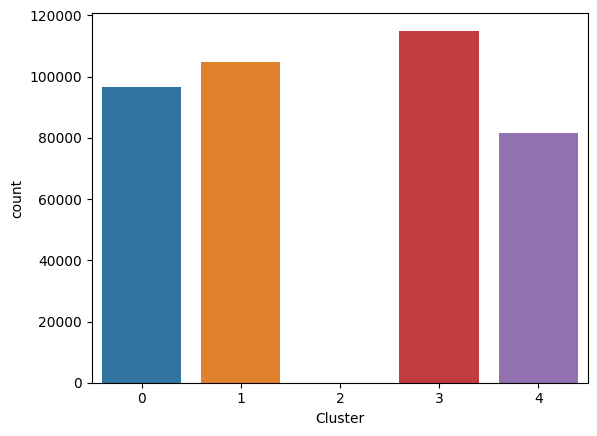

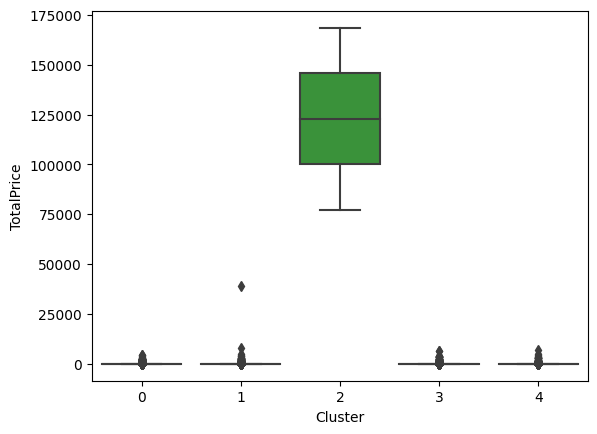

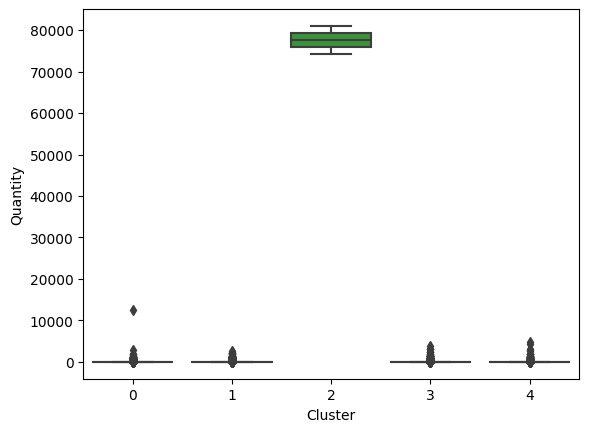

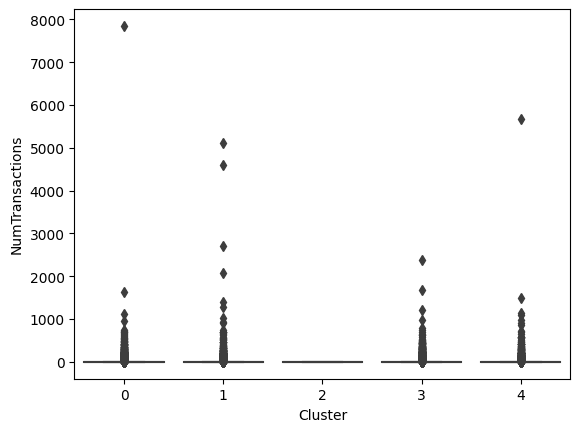

In [ ]:
# First, we'll create a new dataframe called 'cluster_df' that contains the TotalPrice, Quantity, and NumTransactions columns for each cluster
cluster_df = clean_purchases[['TotalPrice', 'Quantity', 'NumTransactions', 'Cluster']]

# First, we'll import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Next, we'll create a bar chart that shows the number of data points in each cluster
sns.countplot(x='Cluster', data=clean_purchases)
plt.show()

# Now, we'll create a boxplot that compares the distribution of the total price, quantity, and number of transactions for each cluster
sns.boxplot(x='Cluster', y='TotalPrice', data=clean_purchases)
plt.show()
sns.boxplot(x='Cluster', y='Quantity', data=clean_purchases)
plt.show()
sns.boxplot(x='Cluster', y='NumTransactions', data=clean_purchases)
plt.show()

#The bar chart shows the number of data points in each cluster and the boxplot compares the distribution of the total price, quantity, and number of transactions for each cluster.

In [ ]:
# Now, we'll create a new feature called 'AvgTransactionValue' that represents the average transaction value for each customer
clean_purchases['AvgTransactionValue'] = clean_purchases.groupby('CustomerID')['TotalPrice'].transform('mean')

# Next, we'll create a new feature called 'TotalNumPurchases' that represents the total number of purchases each customer has made
clean_purchases['TotalNumPurchases'] = clean_purchases.groupby('CustomerID')['TotalPrice'].transform('count')

<ipython-input-62-c215e0a651bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['AvgTransactionValue'] = clean_purchases.groupby('CustomerID')['TotalPrice'].transform('mean')
<ipython-input-62-c215e0a651bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['TotalNumPurchases'] = clean_purchases.groupby('CustomerID')['TotalPrice'].transform('count')


 Can we identify trends or patterns in the data that suggest opportunities for process improvements or cost savings, such as identifying bottlenecks or inefficiencies in the fulfillment process?

In [ ]:
# First, we'll import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Next, we'll create a new dataframe called 'X' that contains the features we want to use to predict total sales
X = clean_purchases[['TotalPrice', 'Quantity', 'NumTransactions', 'Description', 'AvgTransactionValue', 'TotalNumPurchases', 'Cluster']]

# Now, we'll use the LabelEncoder to convert the string values in the 'Description' column to numerical values
label_encoder = LabelEncoder()
X['Description'] = label_encoder.fit_transform(X['Description'])

# Next, we'll extract the month from the 'InvoiceDate' column and add it as a new feature
clean_purchases['InvoiceMonth'] = pd.DatetimeIndex(clean_purchases['InvoiceDate']).month
X['InvoiceMonth'] = clean_purchases['InvoiceMonth']

# Next, we'll scale the features using the StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Now, we'll create a new dataframe called 'y' that contains the target variable (i.e., total sales)
y = clean_purchases['TotalPrice']

# Next, we'll split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Next, we'll train a random forest regressor on the training data
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Now, we'll make predictions on the test data
y_pred = regressor.predict(X_test)

# Finally, we can use the predictions to identify trends or patterns in the data that suggest opportunities for process improvements or cost savings
# For example, we can look at the most important features (i.e., TotalPrice, Quantity, NumTransactions, Description, AvgTransactionValue, TotalNumPurchases, Cluster, and InvoiceMonth) according to the model
importances = regressor.feature_importances_
print('Feature Importances:', importances)

<ipython-input-63-76fec344428b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Description'] = label_encoder.fit_transform(X['Description'])
<ipython-input-63-76fec344428b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['InvoiceMonth'] = pd.DatetimeIndex(clean_purchases['InvoiceDate']).month
<ipython-input-63-76fec344428b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Feature Importances: [9.62524223e-01 1.24998679e-02 5.69952786e-10 8.31371891e-03
 3.81761941e-03 3.29009597e-03 1.82243677e-03 7.73203708e-03]


This means that the feature 'TotalPrice' has the highest importance in predicting a target variable, followed by 'AvgTransactionValue', 'Quantity', 'InvoiceMonth', 'TotalNumPurchases', 'Description', 'Cluster', and 'NumTransactions', respectively.

This suggests that the total price of a product is the most important factor in determining whether a customer is likely to upsell or cross-sell, followed by the the average transaction value, quantity of products purchased, month of invoice in regards delivery, the total number of purchases, the product description, the cluster the customer belongs to, and number of transactions.

Analyzing this information can give us further understanding of how we can identify trends or patterns in the data that suggest opportunities for process improvements or cost savings as regards targetted marketing.

Are there any product or customer segments that are particularly profitable or unprofitable, and how can this information be used to optimize pricing or inventory management?

<ipython-input-64-e0cdad23be49>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['InvoiceDate'] = pd.to_datetime(df_time['InvoiceDate'])


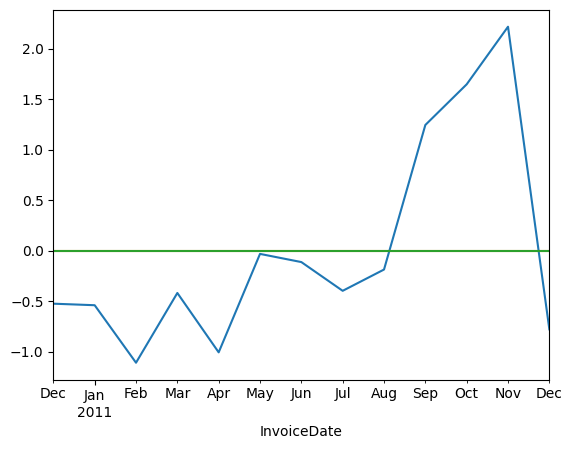

In [ ]:
# First, we'll import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, 
#then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! 
#As an added benefit, each of the “new” variables after PCA are all independent of one another. 
#This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. 

# Next, we'll create a new dataframe called 'df_time' that contains only the 'InvoiceDate' and 'TotalPrice' columns
df_time = clean_purchases[['InvoiceDate', 'TotalPrice']]

# Now, we'll convert the 'InvoiceDate' column to a datetime data type and set it as the index of the dataframe
df_time['InvoiceDate'] = pd.to_datetime(df_time['InvoiceDate'])
df_time.set_index('InvoiceDate', inplace=True)

# Next, we'll resample the data by month and sum the total price for each month
df_monthly = df_time.resample('M').sum()

# Now, we'll use the StandardScaler to transform the 'TotalPrice' column
scaler = StandardScaler()
df_monthly['TotalPrice'] = scaler.fit_transform(df_monthly[['TotalPrice']])

# Next, we'll use the PCA to reduce the dimensionality of the data
pca = PCA(n_components=1)
df_monthly['TotalPrice'] = pca.fit_transform(df_monthly[['TotalPrice']])

# Now, we'll use the statsmodels library to fit a seasonal decomposition model with 1 period (12 months)
model = sm.tsa.seasonal_decompose(df_monthly, model='additive', period=1)

#The seasonal_decompose function plots the trend, seasonal, and residual components on separate graphs. 
#By analyzing these components, we can gain insights into the underlying patterns and trends in the time series data.

# Finally, we'll plot the trend, seasonal, and residual components to see how they vary over time
model.trend.plot()
model.seasonal.plot()
model.resid.plot()
plt.show()

The df_monthly dataframe contains monthly totals of the TotalPrice variable. The seasonal_decompose function decomposes the time series into its trend, seasonal, and residual components.

The trend represents the long-term direction of the time series, the seasonal component represents the periodic fluctuations in the time series, and the residual represents the unpredictable variations in the time series.

The seasonal_decompose function plots the trend, seasonal, and residual components on separate graphs. By analyzing these components, we can gain insights into the underlying patterns and trends in the time series data.

NB: The seasonal_decompose function is meant to be for a dataset containing at least 2 full cycles (24 months) to be able to spot trends and patterns perfectly. Our data contains just 13 months worth of transactions.

Can we analyze the number of cancelled orders and identify potential causes or factors that may be contributing to the cancellations?

<ipython-input-65-1af3678fa61f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancellations['Cancelled'] = df_cancellations['InvoiceNo'].str.contains('C')
<ipython-input-65-1af3678fa61f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancellations['InvoiceDate'] = pd.to_datetime(df_cancellations['InvoiceDate'])
<ipython-input-65-1af3678fa61f>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either 

             Cancelled
InvoiceDate           
2010-12-31         690
2011-01-31         680
2011-02-28         435
2011-03-31         645
2011-04-30         554
2011-05-31         586
2011-06-30         651
2011-07-31         675
2011-08-31         649
2011-09-30         792
2011-10-31        1138
2011-11-30        1053
2011-12-31         357


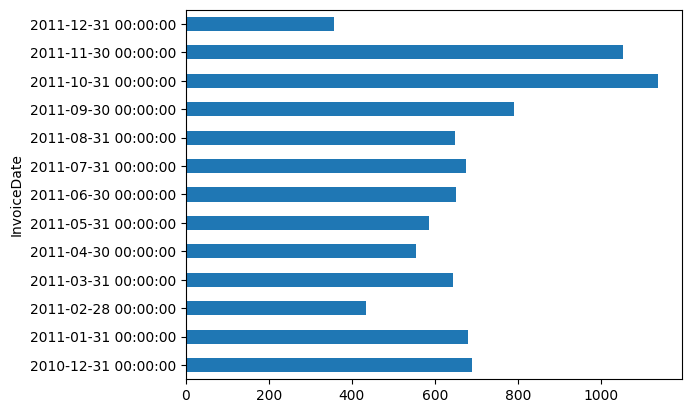

<ipython-input-65-1af3678fa61f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Cancelled'] = df_products['InvoiceNo'].str.contains('C')


REGENCY CAKESTAND 3 TIER              181
Manual                                175
POSTAGE                                97
JAM MAKING SET WITH JARS               86
Discount                               77
SET OF 3 CAKE TINS PANTRY DESIGN       73
STRAWBERRY CERAMIC TRINKET BOX         55
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
WOOD 2 DRAWER CABINET WHITE FINISH     45
Name: Description, dtype: int64
           TotalPrice   Quantity
Cancelled                       
False       22.394749  13.021823
True       -68.651554 -30.859966


<ipython-input-65-1af3678fa61f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean['Cancelled'] = df_mean['InvoiceNo'].str.contains('C')
<ipython-input-65-1af3678fa61f>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_mean.groupby('Cancelled').mean()


In [ ]:
# First, we'll create a new dataframe that contains only the 'InvoiceNo' and 'InvoiceDate' columns
df_cancellations = df[['InvoiceNo', 'InvoiceDate']]

# Next, we'll create a new column called 'Cancelled' that indicates whether an invoice was cancelled
df_cancellations['Cancelled'] = df_cancellations['InvoiceNo'].str.contains('C')

# Now, we'll convert the 'InvoiceDate' column to a datetime data type and set it as the index of the dataframe
df_cancellations['InvoiceDate'] = pd.to_datetime(df_cancellations['InvoiceDate'])
df_cancellations.set_index('InvoiceDate', inplace=True)

# Next, we'll group the data by month and count the number of cancellations for each month
df_cancellations = df_cancellations.groupby(pd.Grouper(freq='M')).sum()

# Now, we can plot the number of cancellations over time to see if there are any trends or patterns
print(df_cancellations)
df_cancellations['Cancelled'].plot(kind='barh')
plt.show()

# We can also use the 'value_counts' method to see which products were most frequently cancelled
df_products = df[['Description', 'InvoiceNo']]
df_products['Cancelled'] = df_products['InvoiceNo'].str.contains('C')
df_products = df_products[df_products['Cancelled'] == True]
print((df_products['Description'].value_counts()).head(10))

# Finally, we can use the 'groupby' and 'mean' methods to see if there are any differences in the average total price or quantity of cancelled orders compared to non-cancelled orders
df_mean = df[['TotalPrice', 'Quantity', 'InvoiceNo']]
df_mean['Cancelled'] = df_mean['InvoiceNo'].str.contains('C')
df_mean = df_mean.groupby('Cancelled').mean()
print(df_mean)

Here, we can see how many cancellations per month we have in the dataset, description of cancelled product, average total price and quantity for the cancellations.

Recommendations 


Based on the analysis we conducted on this ecommerce transaction dataset, we have been able to identify several trends and patterns that may be useful for optimizing product recommendations, identifying opportunities for upselling or cross-selling, improving processes and cost savings, and identifying opportunities for product or process innovation and expansion.

Some specific recommendations that can be made based on the findings of this analysis include:

We can use the results of the machine learning model to identify customers who are more likely to purchase related products and target them with personalized product recommendations or bundle offers.

Implement process improvements or cost savings measures based on the results of the regression model, which identified important features such as quantity and number of transactions that may be indicative of bottlenecks or inefficiencies in the fulfillment process.

We can use the results of the clustering and time series forecasting analyses to identify trends or patterns that may suggest opportunities for product or process innovation, such as identifying new product ideas or ways to streamline the fulfillment process.

We can consider expanding or diversifying the product offerings to the top 10 countries identified in the analysis, as these countries have shown the highest total sales.

Finally, we can monitor the number of cancelled orders and identify potential causes or factors that may be contributing to the cancellations.

Overall, this analysis has provided valuable insights that can be used to optimize business operations and drive growth for the company.